<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/log-reg/Logistic_regression_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Creating Dataset

In [30]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X.shape

(200, 2)

# Train-Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape

(160, 2)

# Applying Logistic Regression

In [33]:
logreg = LogisticRegression()
LR = logreg.fit(X_train, y_train)

In [34]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[0.0302042 , 0.9697958 ],
       [0.44660633, 0.55339367],
       [0.21749155, 0.78250845],
       [0.35440782, 0.64559218],
       [0.57839283, 0.42160717],
       [0.06768323, 0.93231677],
       [0.10207604, 0.89792396],
       [0.69914137, 0.30085863],
       [0.07923072, 0.92076928],
       [0.78118265, 0.21881735],
       [0.81475073, 0.18524927],
       [0.86773327, 0.13226673],
       [0.0614445 , 0.9385555 ],
       [0.99490143, 0.00509857],
       [0.47547428, 0.52452572],
       [0.44582768, 0.55417232],
       [0.60865359, 0.39134641],
       [0.07027304, 0.92972696],
       [0.99404573, 0.00595427],
       [0.07753484, 0.92246516],
       [0.72041607, 0.27958393],
       [0.45149013, 0.54850987],
       [0.43486148, 0.56513852],
       [0.98897627, 0.01102373],
       [0.02353876, 0.97646124],
       [0.05733948, 0.94266052],
       [0.96464719, 0.03535281],
       [0.85415795, 0.14584205],
       [0.34176368, 0.65823632],
       [0.12071106, 0.87928894],
       [0.

In [35]:
y_pred = LR.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

## Observing class samples and class prediction

In [36]:
df = pd.DataFrame({"Probability_class_0": y_pred_prob[:, 0], "Probability_class_1": y_pred_prob[:, 1], "Class_Prediction": y_pred})

In [37]:
df.tail()

,Probability_class_0,Probability_class_1,Class_Prediction
35,0.757263,0.242737,0
36,0.607246,0.392754,0
37,0.029480,0.970520,1
38,0.356258,0.643742,1
39,0.974674,0.025326,0


# Accuracy score (manually)

In [38]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [39]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [40]:
sum(y_pred == y_test)

np.int64(32)

In [41]:
Accuracy = sum(y_pred == y_test) / len(y_test)
Accuracy

np.float64(0.8)

### Another way

In [42]:
Accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {Accuracy}%")

Accuracy: 80.0%


# Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  5],
       [ 3, 18]])

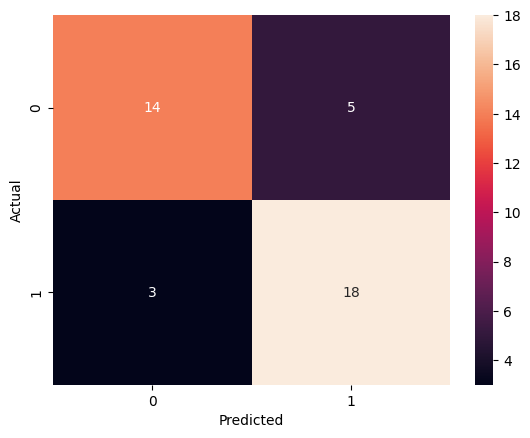

In [44]:
# visualize the cm
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Another way

In [45]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

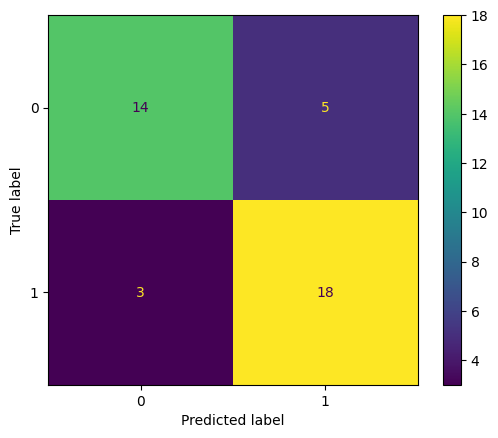

In [46]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()
plt.show()


In [49]:
Accuracy = accuracy_score(y_test, y_pred, normalize=True)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
F1_Score = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {Accuracy}")
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"F1 Score: {F1_Score}")

Accuracy: 0.8
Precision: 0.80306905370844
Recall: 0.7969924812030075
F1 Score: 0.797979797979798


# Classification Report

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        19
           1       0.78      0.86      0.82        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



# Plotting ROC Curve

In [52]:
from sklearn.metrics import RocCurveDisplay

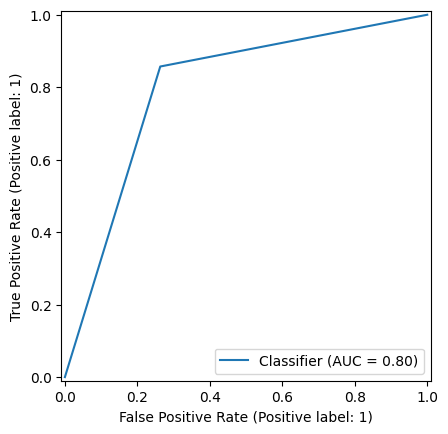

In [57]:
fig, ax = plt.subplots(1,1)
RocCurveDisplay.from_predictions(y_test, y_pred, drop_intermediate=False, ax=ax)
plt.show()